# Визуализация графов в NetworkX

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 1: Введение в сетевой анализ и знакомство с библиотекой NetworkX"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.lattice.grid_2d_graph.html
    * https://networkx.org/documentation/stable/reference/drawing.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.les_miserables_graph.html
    * https://matplotlib.org/stable/users/explain/colors/colormaps.html
    * https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
    

## Вопросы для совместного обсуждения

1\. Рассмотрите основные функции для визуализации графов в NetworkX и их возможности.

In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

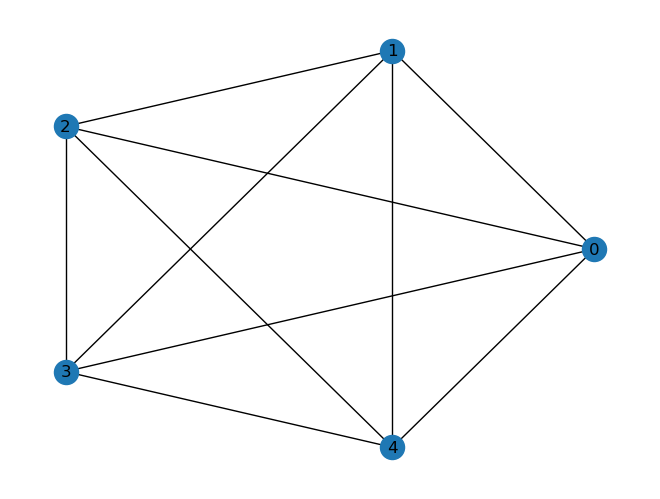

In [2]:
G = nx.complete_graph(5)
# pos = nx.spring_layout(G)
pos = nx.circular_layout(G)
# pos[0] = (-100, 100)
nx.draw(G, pos=pos, with_labels=True)

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте двумерную решетку размера 5х3, используя готовую функцию из `networkx`. Создайте словарь `pos`, в котором ключами являются идентификаторы узлов, а значениями - координаты этих узлов на плоскости. Для получения координат узлов считайте, что идентификатор состоит из пар `(x, y)`, где `x` - позиция по _горизонтали_, а `y` - позиция по _вертикали_. Визуализируйте граф, используя полученный словарь. Добавьте на рисунок подписи узлов.

- [ ] Проверено на семинаре

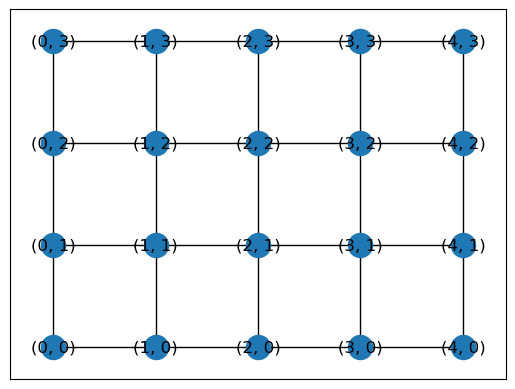

In [3]:
G = nx.grid_2d_graph(5, 4)
pos = {n: n for n in G.nodes}

nx.draw_networkx(G, pos=pos)

<p class="task" id="2"></p>

2\. Создайте граф карате-клуба, используя готовую функцию из `networkx`. Используя несколько функций вида `x_layout`, рассчитайте координаты узлов и визуализируйте все доступные в `networkx` различные укладки в виде сетки из изображений. Каждому изображению в сетке добавьте заголовок в виде названия используемой функции. Если какая-то функция укладки не применима к данному графу, игнорируйте ее.

- [ ] Проверено на семинаре

In [21]:
G = nx.karate_club_graph()

for node in G.nodes():
    G.nodes[node]['subset'] = node % 3

layouts = [
    (nx.drawing.nx_agraph.graphviz_layout, 'agraph'),
    (nx.nx_pydot.graphviz_layout, 'pydot'),
    (nx.arf_layout, 'arf'),
    (nx.bipartite_layout, 'bipartite'),
    (nx.bfs_layout, 'bfs'),
    (nx.circular_layout, 'circular'),
    (nx.kamada_kawai_layout, 'kamada_kawai'),
    (nx.planar_layout, 'planar'),
    (nx.random_layout, 'random'),
    (nx.rescale_layout, 'rescale'),
    (nx.rescale_layout_dict, 'rescale_dict'),
    (nx.shell_layout, 'shell'),
    (nx.spring_layout, 'spring'),
    (nx.spectral_layout, 'spectral'),
    (nx.spiral_layout, 'spiral'),
    (nx.multipartite_layout, 'multipartite'),
]

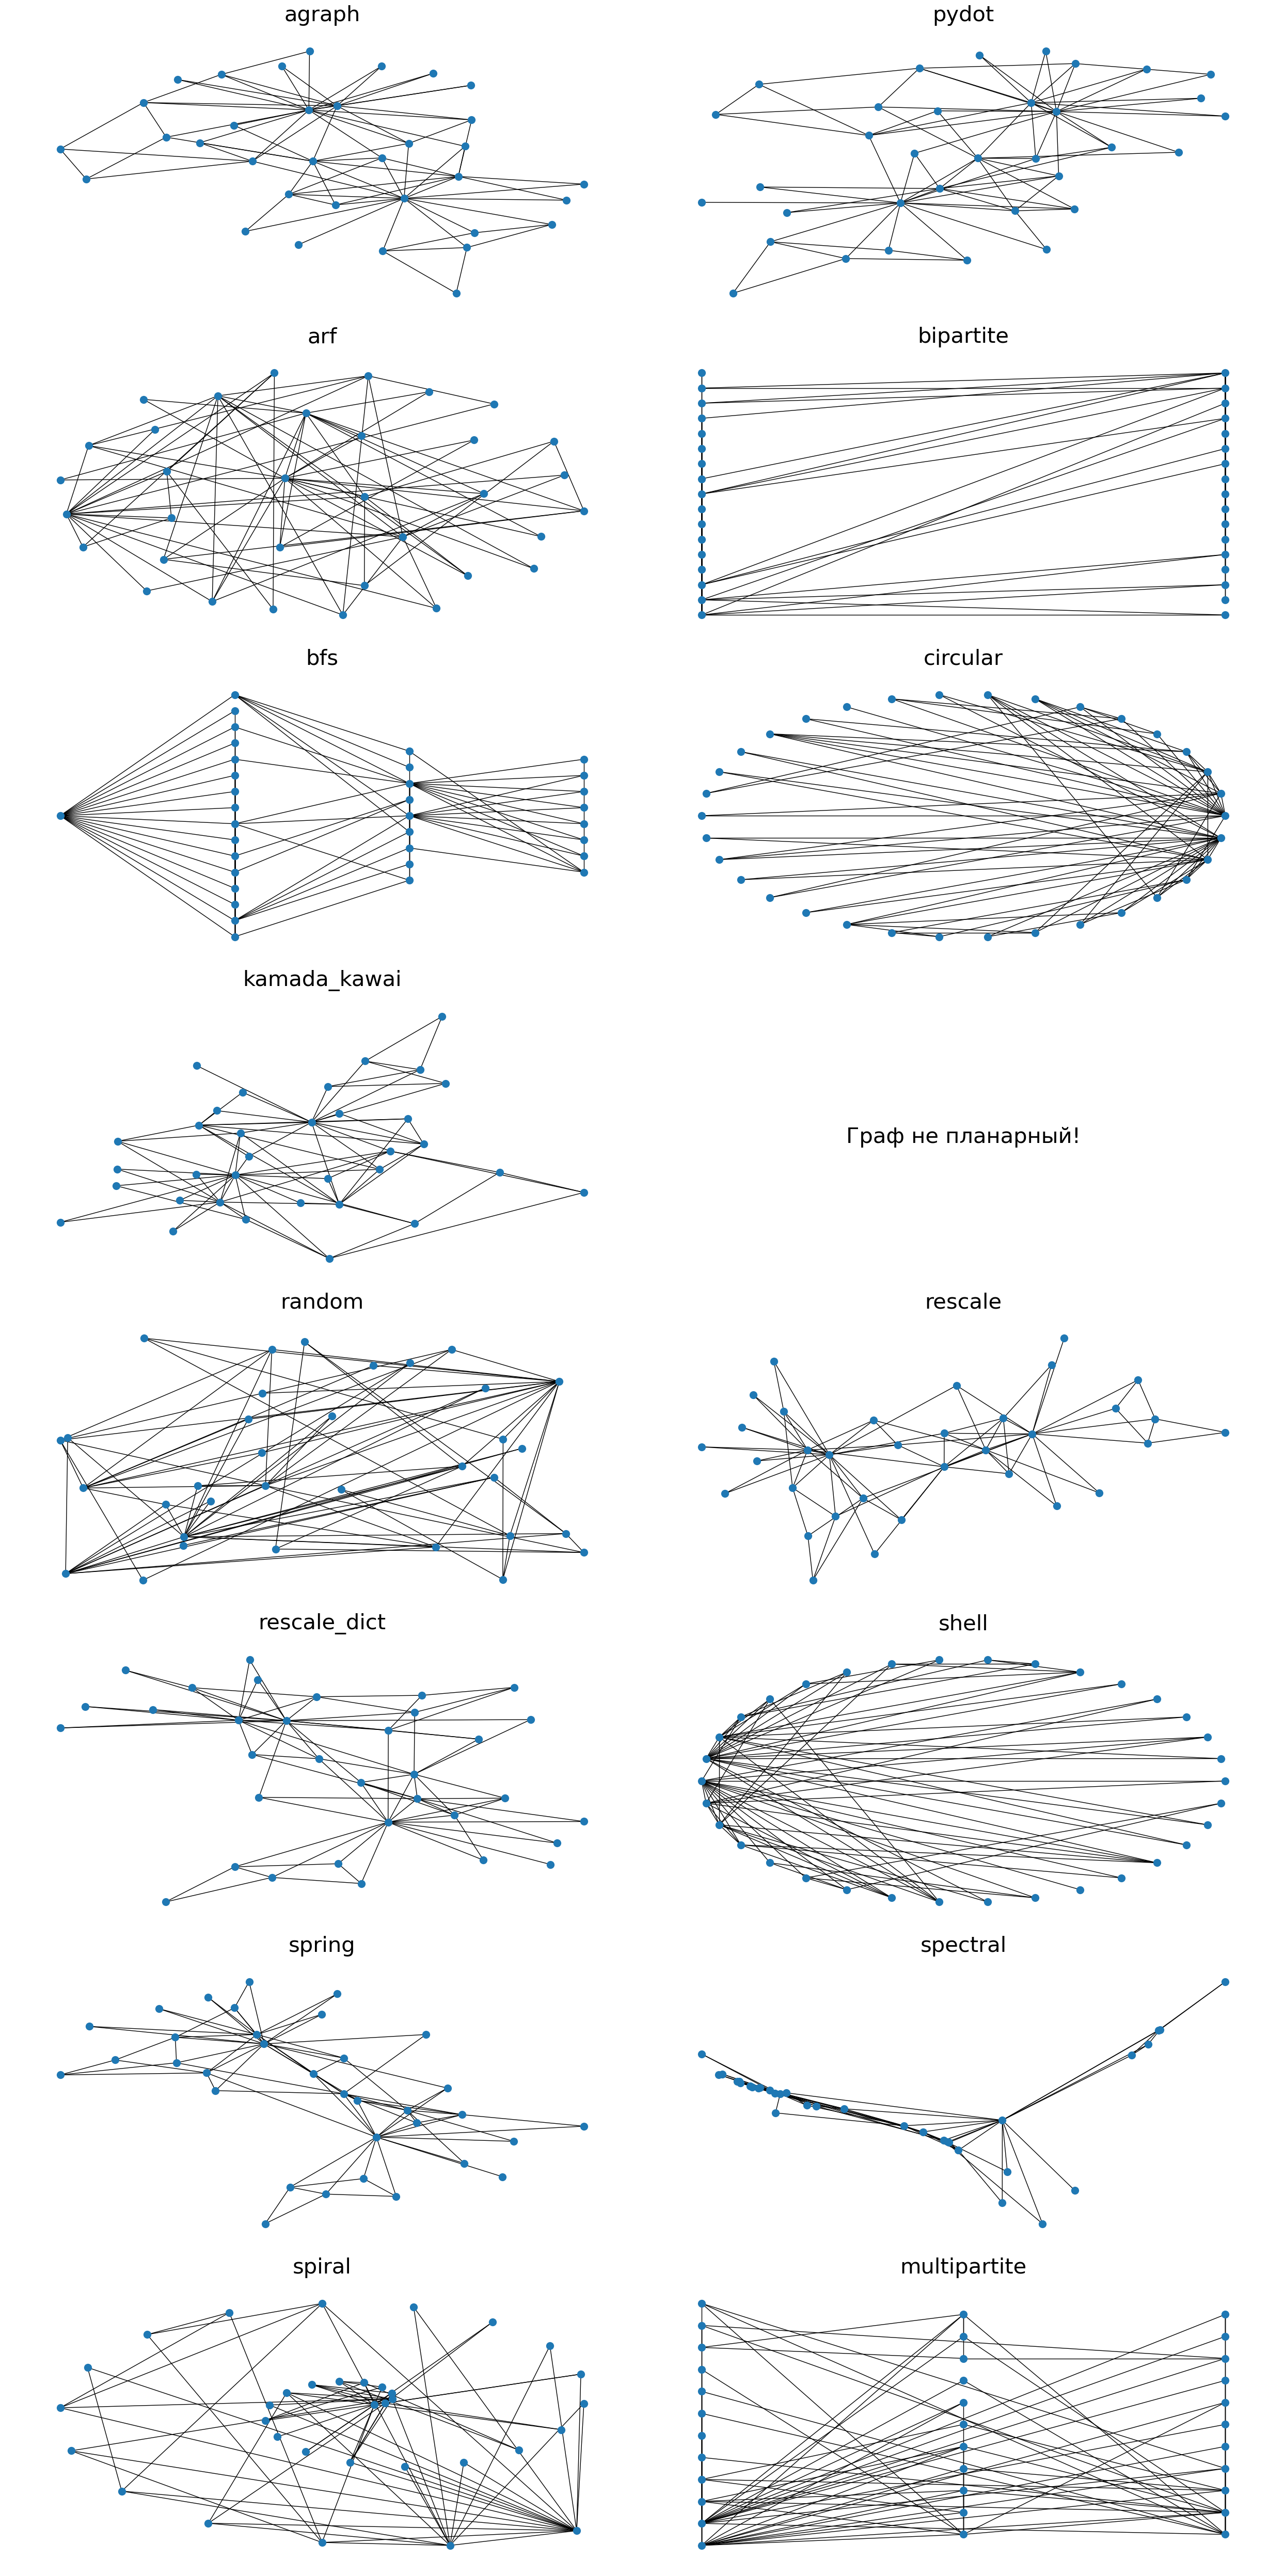

In [ ]:
fig, axes = plt.subplots(8, 2, figsize=(25, 50))
axes = axes.flatten()

for i, (l, name) in enumerate(layouts):
    ax = axes[i]
    
    if l == nx.planar_layout:
        if nx.check_planarity(G)[0]:  
            pos = l(G)
        else:
            ax.text(0.5, 0.5, 'Граф не планарный!', 
                    fontsize=30, ha='center', va='center')
            ax.axis('off')
            continue

    elif l == nx.bipartite_layout:
        pos = l(G, nodes=list(G.nodes())[:len(G)//2])

    elif l == nx.bfs_layout:
        pos = l(G, start=0)

    elif l == nx.rescale_layout:
        base = nx.spring_layout(G)
        pos_arr = np.array(list(base.values()))
        pos = l(pos_arr)

    elif l == nx.rescale_layout_dict:
        base = nx.spring_layout(G)
        pos = l(base)

    else:
        pos = l(G)

    nx.draw(G, pos, ax=ax, node_size=100)
    ax.set_title(name, fontsize=30)
    ax.axis('off')

plt.tight_layout()
plt.show()

<p class="task" id="3"></p>

3\. Создайте граф карате-клуба, используя готовую функцию из `networkx`. Добавьте узлам атрибут `age`, заполненный целыми числами от 20 до 50. Визуализируйте граф, раскрасив узлы в цвет клуба (красный для "Mr. Hi" и зеленый для "Officer") и сделав размер узла пропорциональным величине атрибута `age`.

- [ ] Проверено на семинаре

In [ ]:
G = nx.karate_club_graph()
nx.set_node_attributes(G, {node: random.randint(20, 50) for node in G.nodes}, 'age')
G.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi', 'age': 48}, 1: {'club': 'Mr. Hi', 'age': 24}, 2: {'club': 'Mr. Hi', 'age': 29}, 3: {'club': 'Mr. Hi', 'age': 26}, 4: {'club': 'Mr. Hi', 'age': 27}, 5: {'club': 'Mr. Hi', 'age': 23}, 6: {'club': 'Mr. Hi', 'age': 48}, 7: {'club': 'Mr. Hi', 'age': 23}, 8: {'club': 'Mr. Hi', 'age': 21}, 9: {'club': 'Officer', 'age': 50}, 10: {'club': 'Mr. Hi', 'age': 26}, 11: {'club': 'Mr. Hi', 'age': 21}, 12: {'club': 'Mr. Hi', 'age': 34}, 13: {'club': 'Mr. Hi', 'age': 34}, 14: {'club': 'Officer', 'age': 28}, 15: {'club': 'Officer', 'age': 49}, 16: {'club': 'Mr. Hi', 'age': 28}, 17: {'club': 'Mr. Hi', 'age': 43}, 18: {'club': 'Officer', 'age': 48}, 19: {'club': 'Mr. Hi', 'age': 45}, 20: {'club': 'Officer', 'age': 36}, 21: {'club': 'Mr. Hi', 'age': 46}, 22: {'club': 'Officer', 'age': 27}, 23: {'club': 'Officer', 'age': 26}, 24: {'club': 'Officer', 'age': 31}, 25: {'club': 'Officer', 'age': 45}, 26: {'club': 'Officer', 'age': 29}, 27: {'club': 'Officer', 'age': 44}, 28: {

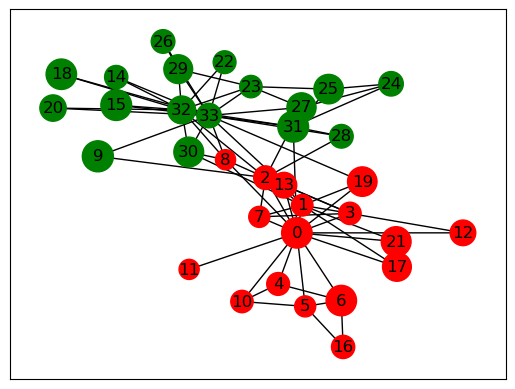

In [ ]:
colors = ['g' if G.nodes[n]['club'] == 'Officer' else 'r' for n in G.nodes]
sizes = [G.nodes[n]['age'] * 10 for n in G.nodes]

nx.draw_networkx(G, node_color=colors, node_size=sizes)

<p class="task" id="4"></p>

4\. Создайте ориентированный граф "путь" из 3 узлов. Визуализируйте граф со стрелками увеличенного размера. Визуализируйте граф, развернув стрелки на визуализации в обратном направлении (сам граф оставьте без изменений). На всех визуализациях добавляйте подписи узлов.

- [ ] Проверено на семинаре

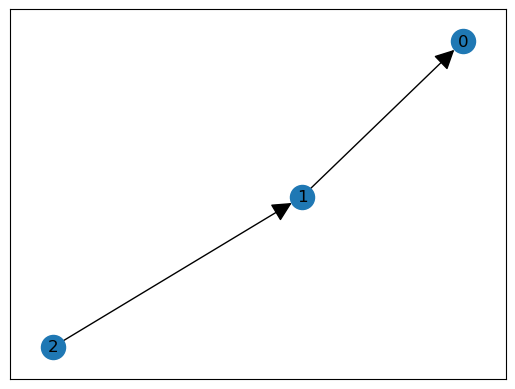

In [ ]:
G = nx.path_graph(3, create_using=nx.DiGraph())
nx.draw_networkx(G, arrowstyle='<|-', arrowsize=30)

<p class="task" id="5"></p>

5\. Создайте граф `Les Miserables`. Для каждого узла зафиксируйте координату на плоскости при помощи функции `random_layout`. Получите список `edge_colors` значений атрибута `weight` на ребрах и ограничьте (clip) его сверху значением 10, снизу значением 1.

Отрисуйте узлы графа при помощи функции `draw_networkx_nodes` с указанием размера узлов 10. На тот рисунок добавьте ребра графа при помощи функции `draw_networkx_edges`, раскрасив ребра в цвет, соответствующий значениям `edge_colors` с применением цветовой карты `viridis`. Добавьте на визуализацию colorbar, показывающий градиент цветов ребер.

- [ ] Проверено на семинаре

In [ ]:
G = nx.les_miserables_graph()
pos = nx.random_layout(G)

G.edges(data=True)

EdgeDataView([('Napoleon', 'Myriel', {'weight': 1}), ('Myriel', 'MlleBaptistine', {'weight': 8}), ('Myriel', 'MmeMagloire', {'weight': 10}), ('Myriel', 'CountessDeLo', {'weight': 1}), ('Myriel', 'Geborand', {'weight': 1}), ('Myriel', 'Champtercier', {'weight': 1}), ('Myriel', 'Cravatte', {'weight': 1}), ('Myriel', 'Count', {'weight': 2}), ('Myriel', 'OldMan', {'weight': 1}), ('Myriel', 'Valjean', {'weight': 5}), ('MlleBaptistine', 'MmeMagloire', {'weight': 6}), ('MlleBaptistine', 'Valjean', {'weight': 3}), ('MmeMagloire', 'Valjean', {'weight': 3}), ('Valjean', 'Labarre', {'weight': 1}), ('Valjean', 'Marguerite', {'weight': 1}), ('Valjean', 'MmeDeR', {'weight': 1}), ('Valjean', 'Isabeau', {'weight': 1}), ('Valjean', 'Gervais', {'weight': 1}), ('Valjean', 'Fantine', {'weight': 9}), ('Valjean', 'MmeThenardier', {'weight': 7}), ('Valjean', 'Thenardier', {'weight': 12}), ('Valjean', 'Cosette', {'weight': 31}), ('Valjean', 'Javert', {'weight': 17}), ('Valjean', 'Fauchelevent', {'weight': 8})

In [ ]:
edgecolors = np.clip([G.edges[e]['weight'] for e in G.edges], 1, 10)
edgecolors

array([ 1,  8, 10,  1,  1,  1,  1,  2,  1,  5,  6,  3,  3,  1,  1,  1,  1,
        1,  9,  7, 10, 10, 10,  8,  2,  3,  1,  2,  3,  3,  2,  2,  2,  3,
        1,  1,  2,  2, 10,  4,  1,  1,  1,  1,  1,  1,  2,  4,  4,  4,  3,
        3,  3,  3,  4,  4,  3,  3,  3,  3,  1,  1,  4,  3,  3,  3,  3,  4,
        3,  3,  3,  5,  4,  4,  4,  4,  4,  2,  1,  5,  1,  1,  2, 10,  4,
        1,  2,  1,  1,  1,  1,  1,  1,  5,  1,  1,  3,  2,  1,  2,  5,  6,
        4,  1,  3,  1,  1,  3,  2,  1, 10,  2,  1,  1,  1,  1,  1,  1,  6,
        1,  2,  1,  1,  1,  3,  2,  2,  2,  1,  1,  1,  2,  3,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  1,  1,  2,  5,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  4,  1,  7,  6,  1,  2,  7,  5,  5,  3,  1,  1,  1,  1,  2,
        2,  1,  1,  1,  9,  1, 10,  1,  1,  1,  2,  6,  1,  1,  1,  7,  5,
        1,  9,  1,  5,  2,  1,  2,  1,  2,  2,  1,  1,  3, 10,  4,  6, 10,
        4, 10,  5,  3,  1,  1,  2,  5, 10,  5,  9,  5,  1,  2,  3,  2,  2,
        2,  1,  6,  3,  6

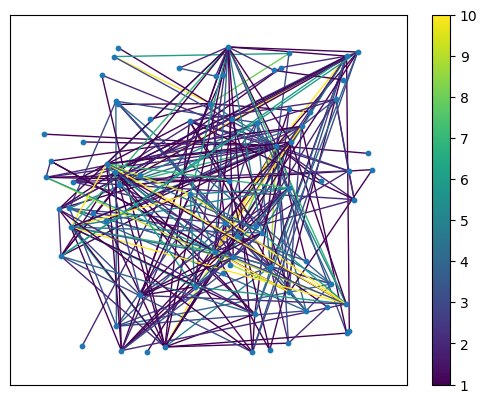

In [ ]:
nodes  = nx.draw_networkx_nodes(G, pos=pos, node_size=10)
edges = nx.draw_networkx_edges(G, edge_color=edgecolors, edge_cmap=plt.cm.viridis, pos=pos)
plt.colorbar(edges)
plt.show()